In [6]:
import os
import random
import pandas as pd
from PIL import Image
import cv2
from IPython.display import Video
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
import pathlib
import glob
from tqdm.notebook import trange, tqdm
import warnings
import yaml
import plotly.express as px
from collections import Counter
warnings.filterwarnings('ignore')

Visualizing some random images

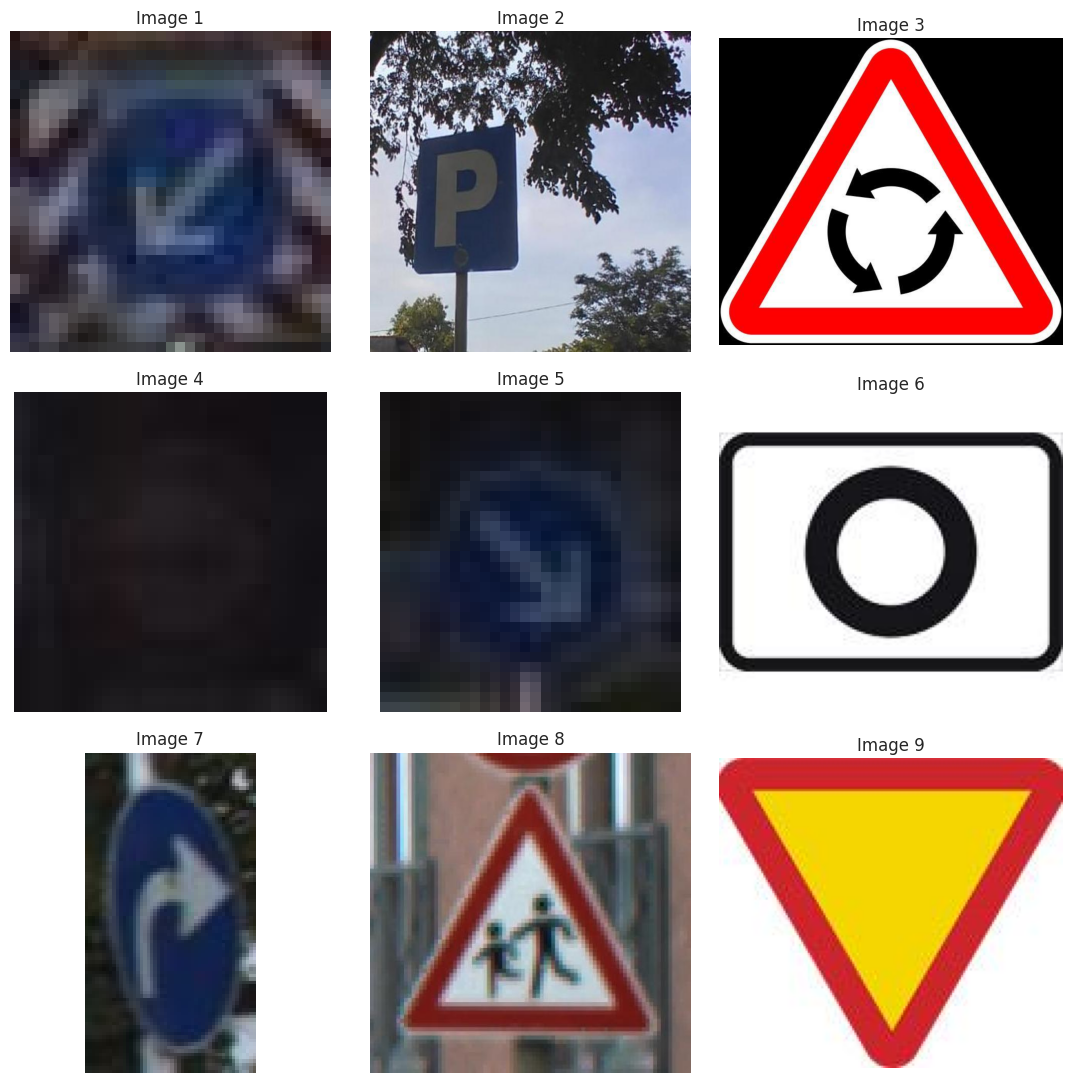

In [3]:
Image_dir = '/content/drive/MyDrive/Final/train/images'

num_samples = 9
image_files = os.listdir(Image_dir)

rand_images = random.sample(image_files, num_samples)

fig, axes = plt.subplots(3, 3, figsize=(11, 11))

for i in range(num_samples):
    image = rand_images[i]
    ax = axes[i // 3, i % 3]
    ax.imshow(plt.imread(os.path.join(Image_dir, image)))
    ax.set_title(f'Image {i+1}')
    ax.axis('off')

plt.tight_layout()
plt.show()

Histogram of classes distribution

In [5]:

annotations_dir = '/content/drive/MyDrive/Final/train/labels'

class_names = [
    'Ahead-only', 'Bicycle Lane', 'Crosswalk', 'End of Restrictions', 'Keep Right',
    'Keep left', 'No Cycling', 'No Overtaking', 'No Stopping', 'No-entry',
    'Parking', 'Priority Road', 'Public Service', 'Roundabouts', 'Speed Limit',
    'Turn Left', 'Turn Right', 'Vehicle Restrictions', 'Warning Signs - Animals',
    'Warning Signs - Humans', 'Warning Signs - Roads', 'adjoining way', 'stop', 'yield'
]

annotation_files = [os.path.join(annotations_dir, f) for f in os.listdir(annotations_dir) if f.endswith('.txt')]

class_counts = Counter()

for file in annotation_files:
    with open(file, 'r') as f:
        lines = f.readlines()
        for line in lines:
            class_id = int(line.split()[0])
            class_counts[class_id] += 1

class_counts_named = {class_names[class_id]: count for class_id, count in class_counts.items()}

train_class_df = pd.DataFrame(class_counts_named.items(), columns=['Class', 'Count'])

fig = px.bar(train_class_df, x='Class', y='Count',
             title='Class Distribution in Training Set',
             labels={'Class': 'Traffic Sign Class', 'Count': 'Number of Instances'},
             hover_data=['Class', 'Count'])

fig.update_layout(xaxis_tickangle=-90, height=800, width=1200)

fig.show()


Nombre d'occurences par Class

In [7]:
data_yaml_path = '/content/drive/MyDrive/Final/data.yaml'
with open(data_yaml_path, 'r') as f:
    data_yaml = yaml.safe_load(f)
class_names = data_yaml['names']

annotations_dir = '/content/drive/MyDrive/Final/train/labels'

annotation_files = [os.path.join(annotations_dir, f) for f in os.listdir(annotations_dir) if f.endswith('.txt')]

class_counts = Counter()

for file in annotation_files:
    with open(file, 'r') as f:
        lines = f.readlines()
        for line in lines:
            class_id = int(line.split()[0])
            class_counts[class_id] += 1

print("ID Classe | Nom de la classe                      | Nombre d'occurrences")
print("------------------------------------------------------------------------")
for class_id, count in sorted(class_counts.items()):
    class_name = class_names[class_id] if class_id < len(class_names) else "Unknown"
    print(f"{class_id:<9} | {class_name:<35} | {count}")


ID Classe | Nom de la classe                      | Nombre d'occurrences
------------------------------------------------------------------------
0         | Ahead-only                          | 58
1         | Bicycle Lane                        | 72
2         | Crosswalk                           | 99
3         | End of Restrictions                 | 115
4         | Keep Right                          | 116
5         | Keep left                           | 78
6         | No Cycling                          | 29
7         | No Overtaking                       | 195
8         | No Stopping                         | 102
9         | No-entry                            | 116
10        | Parking                             | 58
11        | Priority Road                       | 107
12        | Public Service                      | 44
13        | Roundabouts                         | 71
14        | Speed Limit                         | 401
15        | Turn Left                           | 55